In [3]:
import numpy as np

f = "/home/george-vengrovski/Documents/projects/tweety_bert_paper/files/umap_dict_file.npz"

f = np.load(f, allow_pickle=True)

spec = f["behavioralArr"]
labels = f["colors_per_timepoint"]



FileNotFoundError: [Errno 2] No such file or directory: '/home/george-vengrovski/Documents/projects/tweety_bert_paper/files/umap_dict_file.npz'

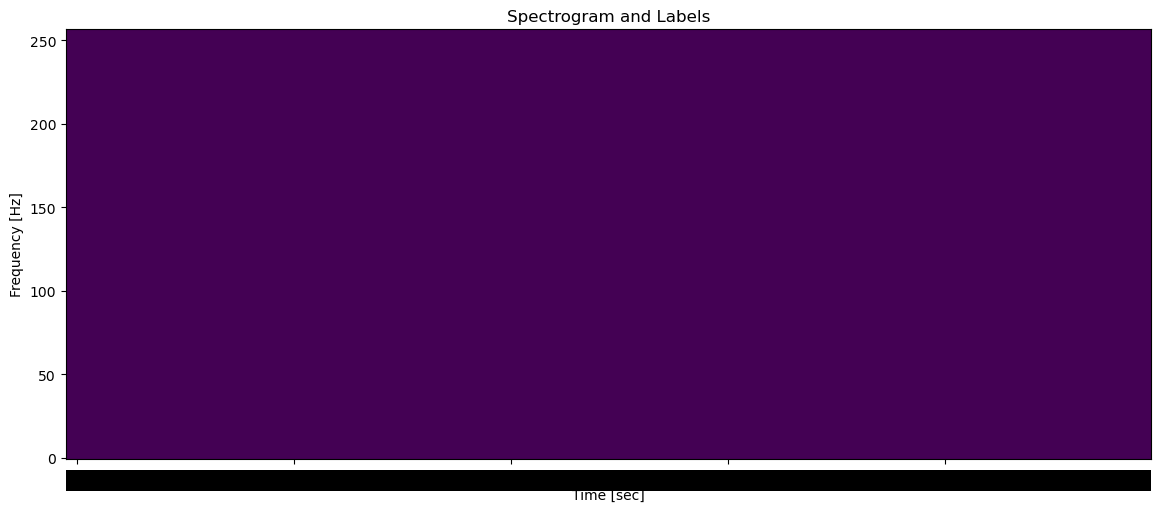

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_spectrogram_with_labels(file_path):
    # Load data from the .npz file
    data = np.load(file_path, allow_pickle=True)
    spec = data["behavioralArr"]  # Spectrogram data
    labels = data["colors_per_timepoint"]  # RGB color labels per timepoint
    
    # Only consider the first 5000 timepoints for plotting
    spec_slice = spec[:, :5000]  # Take all frequency bins, but only the first 5000 timepoints
    labels_slice = labels[:5000, :]  # Take the first 5000 RGB labels
    
    # Set up the figure and gridspec
    fig = plt.figure(figsize=(14, 6))
    gs = fig.add_gridspec(2, 1, height_ratios=[20, 1], hspace=0.05)
    
    # Create a spectrogram axis
    ax0 = fig.add_subplot(gs[0])
    im = ax0.imshow(spec_slice, aspect='auto', origin='lower')
    ax0.set_xlabel('Time [sec]')
    ax0.set_ylabel('Frequency [Hz]')
    ax0.set_title('Spectrogram and Labels')

    # # Add the main color bar for the spectrogram
    # cbar = fig.colorbar(im, ax=ax0, orientation='horizontal', pad=0.01)
    # cbar.set_label('Amplitude')

    # Create an axis for the labels color bar
    ax1 = fig.add_subplot(gs[1])
    ax1.imshow(labels_slice[np.newaxis, :, :], aspect='auto', origin='lower', cmap=mcolors.ListedColormap(labels_slice))
    
    # Remove y-ticks, y-label and x-ticks from the labels color bar
    ax1.axis('off')

    plt.show()

# Load the NPZ file and call the function to plot
file_path = "/home/george-vengrovski/Documents/projects/tweety_bert_paper/files/labels_noclip_double_size_V_2_5e5.npz"
plot_spectrogram_with_labels(file_path)


In [5]:

import numpy as np

f = "files/labels_cmap_test.npz"

f = np.load(f, allow_pickle=True)
print(f["embedding_outputs"])


[[10.162288   6.1396327]
 [10.09827    5.4736133]
 [10.439884   5.5453095]
 ...
 [-2.872839   8.016115 ]
 [-2.2278097  8.469915 ]
 [-1.7873737  8.838995 ]]


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

import sys
sys.path.append("src")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

import os
import torch
from data_class import SongDataSet_Image, CollateFunction
from model import TweetyBERT
from trainer import ModelTrainer
from utils import detailed_count_parameters
import json
import shutil
from itertools import cycle
from torch.utils.data import DataLoader

# collate_fn = CollateFunction(segment_length=1000)
train_dataset = SongDataSet_Image("files/yarden_llb3_test", num_classes=30)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False,  num_workers=16)
train_loader= iter(train_loader)

cuda


In [56]:
s,_ = next(train_loader)
print(s.shape)

torch.Size([1, 3145, 513])
